# 1. Objective

To fit models for longitudinal studies, where observations are made on subjects at specific time intervals

In [23]:
data_df = read_csv("data/autism.csv")

Parsed with column specification:
cols(
  age = col_double(),
  vsae = col_double(),
  sicdegp = col_double(),
  childid = col_double()
)


In [24]:
glimpse(data_df)

Observations: 612
Variables: 4
$ age     <dbl> 2, 3, 5, 9, 13, 2, 3, 5, 9, 13, 2, 3, 5, 9, 2, 3, 9, 13, 2, 3…
$ vsae    <dbl> 6, 7, 18, 25, 27, 17, 18, 12, 18, 24, 12, 14, 38, 114, 17, 27…
$ sicdegp <dbl> 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3…
$ childid <dbl> 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 4, 4, 4, 4, 19, 19, 19, 19, 21,…


In [25]:
data_df %>%
    mutate(sicdegp = case_when(sicdegp == 3 ~ 0,
                               sicdegp == 2 ~ 2,
                               sicdegp == 1 ~ 1)) %>%
    mutate(sicdegp = factor(sicdegp),
           age = age - 2) ->
    data_df

In [26]:
glimpse(data_df)

Observations: 612
Variables: 4
$ age     <dbl> 0, 1, 3, 7, 11, 0, 1, 3, 7, 11, 0, 1, 3, 7, 0, 1, 7, 11, 0, 1…
$ vsae    <dbl> 6, 7, 18, 25, 27, 17, 18, 12, 18, 24, 12, 14, 38, 114, 17, 27…
$ sicdegp <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ childid <dbl> 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 4, 4, 4, 4, 19, 19, 19, 19, 21,…


Here we are making repeated observations at `age` 2, 3, 5, 9 and 13 for each child on the response variable `vsae`. The formal model proposed is:

For the child $i$ at the $t$ th visit:

$$vsae_{ti} = \beta_0 + \beta_1 age_{ti} + \beta_2 age_{ti}^2 + \beta_3 sicdegp1_i + \beta_4 sicdegp2_i + \\
              \beta_5 age_{ti} \times sicdegp1_i + \beta_6 age_{ti} \times sicdegp2_i + \\ 
              \beta_7 age_{ti}^2 \times sicdegp1_i + \beta_8 age_{ti}^2 \times sicdegp2_i + \\
               u_{0i} + u_{1i} age_{ti} + u_{2i} age_{ti}^2 + \epsilon_{ti}$$

$$ u_i = \begin{bmatrix} u_{0i} \\ u_{1i} \\ u_{2i} \end{bmatrix}, \epsilon_{ti} \sim N(0, \sigma^2)$$

In [27]:
grouped_data_df = groupedData(vsae ~ age | childid, data = data_df, order.groups = FALSE)

In [28]:
base_model = lme(vsae ~ age + I(age^2) + sicdegp + age:sicdegp + I(age^2):sicdegp,
                 random = ~ age + I(age^2) - 1,
                 data = grouped_data_df,
                 method = "REML",
                 na.action = na.omit)

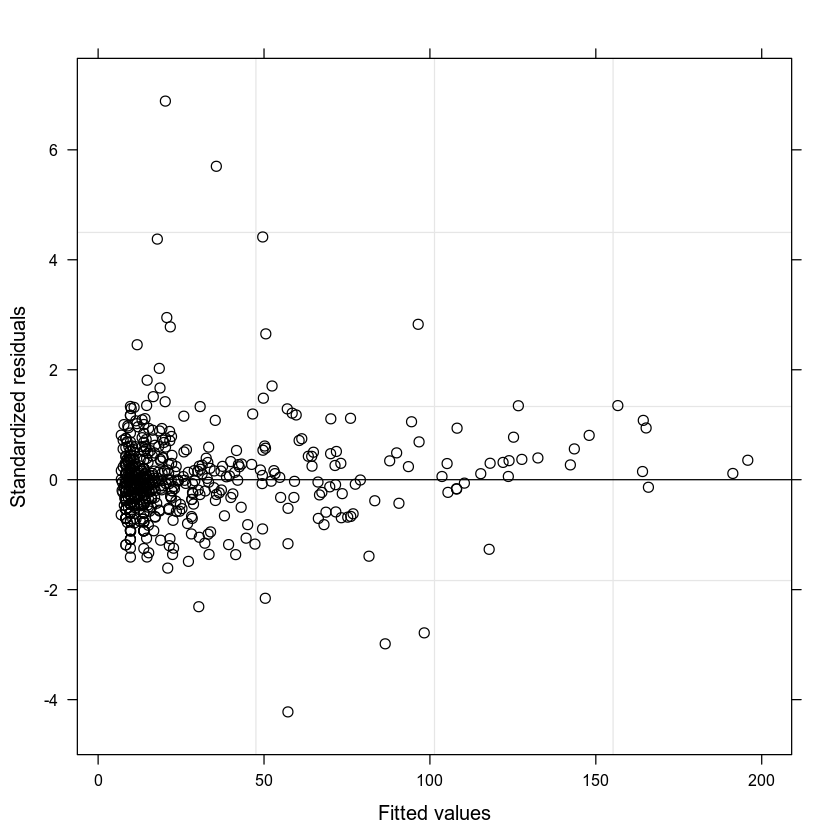

In [29]:
plot(base_model, col = 1)

In [30]:
proposed_model1 = lme(vsae ~ age + I(age^2) + sicdegp + age:sicdegp,
                      random = ~ age + I(age^2) - 1,
                      data = grouped_data_df,
                      method = "REML",
                      na.action = na.omit)

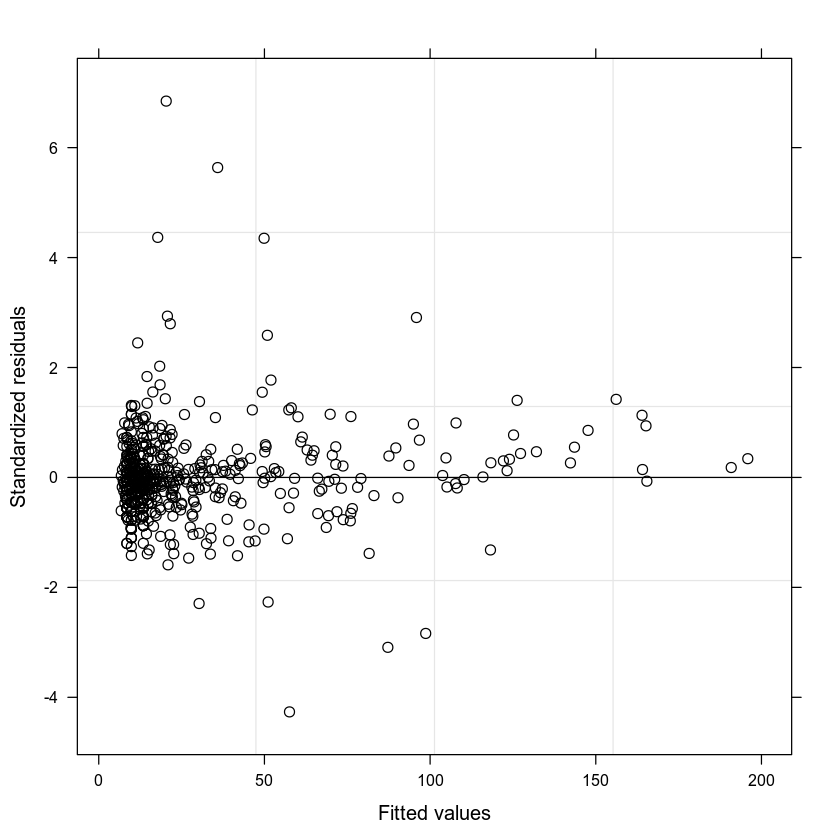

In [31]:
plot(proposed_model1, col = 1)

In [32]:
summary(proposed_model1)

Linear mixed-effects model fit by REML
 Data: grouped_data_df 
      AIC      BIC    logLik
  4633.57 4681.991 -2305.785

Random effects:
 Formula: ~age + I(age^2) - 1 | childid
 Structure: General positive-definite, Log-Cholesky parametrization
         StdDev    Corr  
age      3.8110274 age   
I(age^2) 0.3556805 -0.306
Residual 6.2281389       

Fixed effects: vsae ~ age + I(age^2) + sicdegp + age:sicdegp 
                 Value Std.Error  DF   t-value p-value
(Intercept)  13.463533 0.7815177 448 17.227419  0.0000
age           6.148750 0.6882638 448  8.933711  0.0000
I(age^2)      0.109008 0.0427795 448  2.548125  0.0112
sicdegp1     -4.987639 1.0379064 155 -4.805480  0.0000
sicdegp2     -3.622820 0.9774516 155 -3.706394  0.0003
age:sicdegp1 -4.068041 0.8797676 448 -4.623995  0.0000
age:sicdegp2 -3.495530 0.8289509 448 -4.216812  0.0000
 Correlation: 
             (Intr) age    I(g^2) scdgp1 scdgp2 ag:sc1
age          -0.341                                   
I(age^2)      0.177 -0

In [33]:
intervals(proposed_model1)

Approximate 95% confidence intervals

 Fixed effects:
                   lower       est.      upper
(Intercept)  11.92763665 13.4635325 14.9994284
age           4.79612387  6.1487505  7.5013770
I(age^2)      0.02493412  0.1090076  0.1930811
sicdegp1     -7.03790561 -4.9876387 -2.9373718
sicdegp2     -5.55366546 -3.6228202 -1.6919749
age:sicdegp1 -5.79702489 -4.0680411 -2.3390574
age:sicdegp2 -5.12464461 -3.4955296 -1.8664146
attr(,"label")
[1] "Fixed effects:"

 Random Effects:
  Level: childid 
                       lower       est.       upper
sd(age)            3.1957535  3.8110274  4.54475913
sd(I(age^2))       0.2889534  0.3556805  0.43781668
cor(age,I(age^2)) -0.5133882 -0.3062872 -0.06547264

 Within-group standard error:
   lower     est.    upper 
5.770568 6.228139 6.721992 

In [37]:
proposed_model2 = lme(vsae ~ age + I(age^2) + sicdegp + age:sicdegp,
                      random = ~ age + I(age^2) - 1,
                      data = grouped_data_df,
                      weights = varIdent(form = ~ 1 | age),
                      method = "REML",
                      na.action = na.omit)

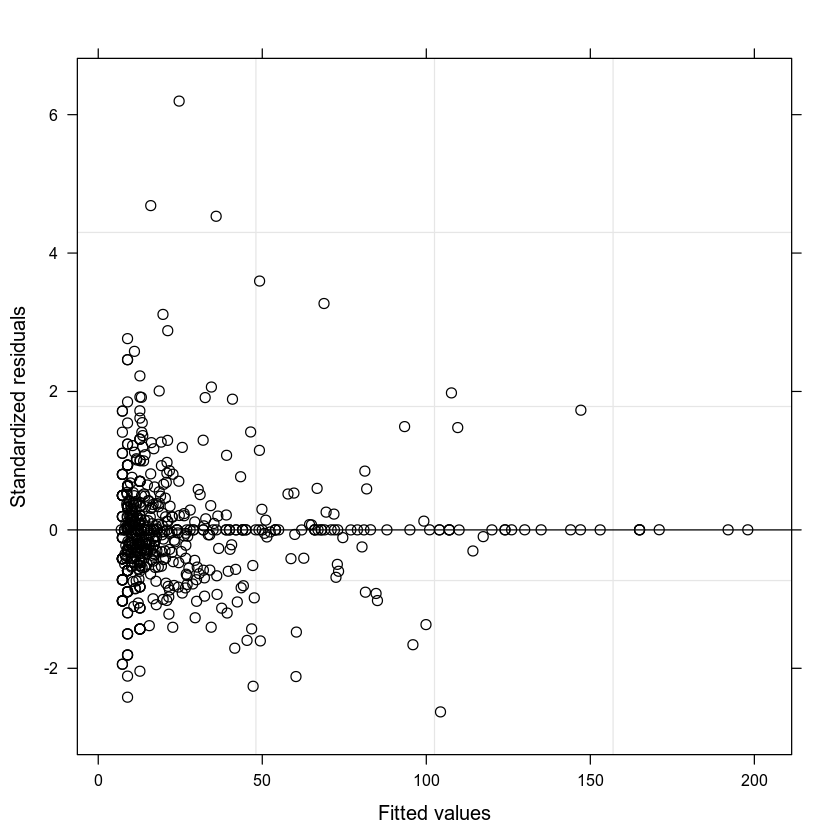

In [39]:
plot(proposed_model2, col = 1)

In [42]:
data_df %>%
    mutate(index = case_when(age == 0 ~ 1,
                             age == 1 ~ 2,
                             age == 3 ~ 3,
                             age == 7 ~ 4,
                             age == 11 ~ 5)) ->
    data_df

proposed_model3 = gls(vsae ~ age*sicdegp + I(age^2),
                      correlation = corSymm(form = ~ index | childid),
                      weights = varIdent(form = ~ 1 | age),
                      data = data_df,
                      na.action = na.omit)

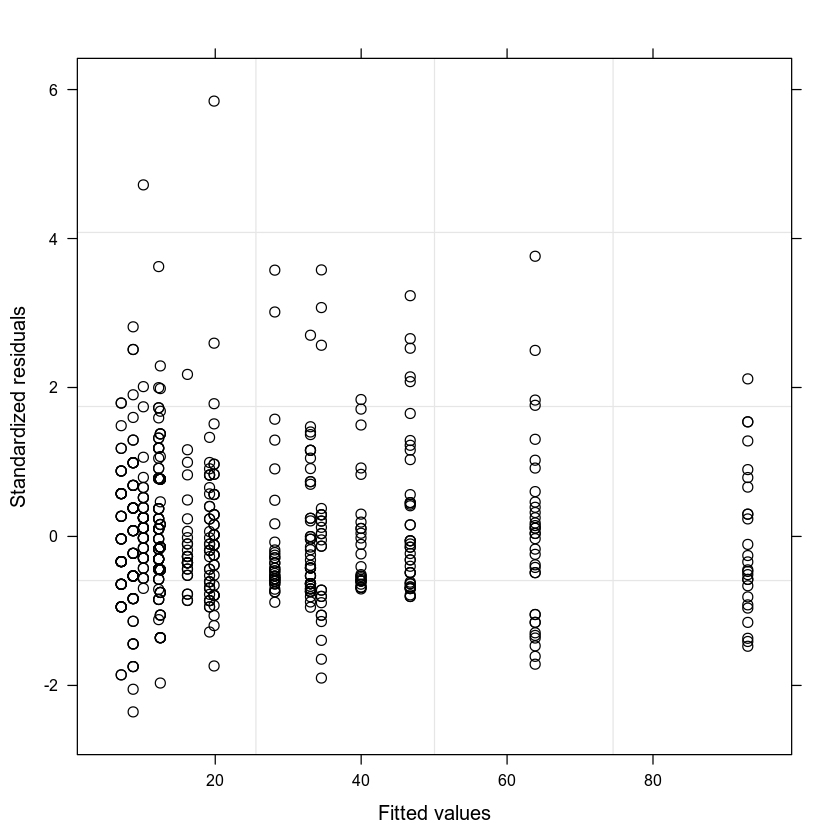

In [44]:
plot(proposed_model3, col = 1)

In [45]:
summary(proposed_model3)

Generalized least squares fit by REML
  Model: vsae ~ age * sicdegp + I(age^2) 
  Data: data_df 
       AIC      BIC    logLik
  4467.693 4564.535 -2211.846

Correlation Structure: General
 Formula: ~index | childid 
 Parameter estimate(s):
 Correlation: 
  1     2     3     4    
2 0.365                  
3 0.214 0.630            
4 0.263 0.448 0.574      
5 0.280 0.543 0.664 0.870
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | age 
 Parameter estimates:
        0         1         3         7        11 
 1.000000  2.245533  3.607443  8.661933 14.232244 

Coefficients:
                 Value Std.Error   t-value p-value
(Intercept)  12.471584 0.5024636 24.820872   0.000
age           7.373850 0.6042508 12.203294   0.000
sicdegp1     -5.361092 0.6691471 -8.011829   0.000
sicdegp2     -3.725960 0.6307949 -5.906770   0.000
I(age^2)     -0.004881 0.0373257 -0.130761   0.896
age:sicdegp1 -4.332097 0.7787670 -5.562764   0.000
age:sicdegp2 -3.867433 0.

In [46]:
intervals(proposed_model3)

Approximate 95% confidence intervals

 Coefficients:
                   lower         est.       upper
(Intercept)  11.48479288 12.471584035 13.45837519
age           6.18715835  7.373850036  8.56054172
sicdegp1     -6.67523440 -5.361092470 -4.04695054
sicdegp2     -4.96478233 -3.725960500 -2.48713867
I(age^2)     -0.07818491 -0.004880761  0.06842338
age:sicdegp1 -5.86152204 -4.332097030 -2.80267202
age:sicdegp2 -5.30790780 -3.867433064 -2.42695833
attr(,"label")
[1] "Coefficients:"

 Correlation structure:
              lower      est.     upper
cor(1,2) 0.20992955 0.3647358 0.5017015
cor(1,3) 0.03047094 0.2135803 0.3828196
cor(1,4) 0.09814369 0.2625146 0.4129428
cor(1,5) 0.11343728 0.2801629 0.4315420
cor(2,3) 0.44999263 0.6299230 0.7607048
cor(2,4) 0.29248265 0.4481063 0.5806067
cor(2,5) 0.40452437 0.5429622 0.6570737
cor(3,4) 0.40552037 0.5736628 0.7042547
cor(3,5) 0.53020247 0.6643710 0.7660801
cor(4,5) 0.81042294 0.8698305 0.9115313
attr(,"label")
[1] "Correlation structure:"

 V

# R environment

In [2]:
library(tidyverse)
library(nlme)
library(glmmTMB)
library(DHARMa)

Registered S3 method overwritten by 'DHARMa':
  method        from   
  refit.glmmTMB glmmTMB

Attaching package: ‘DHARMa’

The following object is masked from ‘package:nlme’:

    getResponse



In [3]:
setwd("~/mixed-effects-models")

In [4]:
print(sessionInfo())

R version 3.6.1 (2019-07-05)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] DHARMa_0.2.4    glmmTMB_0.2.3   nlme_3.1-141    forcats_0.4.0  
 [5] stringr_1.4.0   dplyr_0.8.0.1   purrr_0.3.2     readr_1.3.1    
 [9] tidyr_0.8.3     tibble_2.1.1    ggplot2_3.1.1   tidyverse_1.2.1

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1          lubridate_1.7.4     lattice_0.20-38    
 [4] assertt